In [15]:
import pandas as pd
import matplotlib.pyplot as plt

In [43]:
df_ab = pd.read_pickle('./output/1_df_raf_final-win-0924.pkl.zstd', compression='zstd')

df_b = pd.read_pickle('output/1_df_b_rafs_new-win-0924.pkl.zstd', compression='zstd')
df_b_shaders = pd.read_pickle('./output/1_df_b_shaders-win-0924.pkl.zstd', compression='zstd')
df_b_offscreen = pd.read_pickle('./output/1_df_raf_offscreen-win-0924.pkl.zstd', compression='zstd')
df_b_extensions = pd.read_pickle('./output/1_df_raf_extensions-win-0924.pkl.zstd', compression='zstd')


In [55]:
df_b_programs = pd.read_pickle('./output/1_df_programs-win-0924.pkl.zstd', compression='zstd')

In [44]:
df_perf = pd.read_pickle('../performance/output/df_performance-win-0924.pkl.zstd', compression='zstd')
df_perf = df_perf[df_perf.status == 'Ok'].drop(columns='status')
ok_index = df_perf.index

In [45]:
df_ab = df_ab.join(df_perf[[]], how='right', lsuffix='_ab', rsuffix='_perf').fillna(0)

In [46]:
df_b_shaders = df_b_shaders[df_b_shaders['index_webapp'].isin(ok_index)]

In [47]:
df_b = df_b.join(df_perf[[]], how='right', on='index_webapp', lsuffix='_b', rsuffix='_perf').fillna(0)
df_b = df_b[df_b['index_webapp'].isin(ok_index)]

In [48]:
df_b_offscreen = pd.DataFrame(df_b_offscreen).join(df_perf[[]], how='right', on='index_webapp', lsuffix='_b', rsuffix='_perf').fillna(0)
df_b_offscreen = df_b_offscreen[df_b_offscreen['index_webapp'].isin(ok_index)].set_index('index_webapp')

In [49]:
df_b_extensions = pd.DataFrame(df_b_extensions).join(df_perf[[]], how='right', on='index_webapp', lsuffix='_b', rsuffix='_perf').fillna(0)
df_b_extensions = df_b_extensions[df_b_extensions['index_webapp'].isin(ok_index)]

In [57]:
df_b_programs = df_b_programs[df_b_programs['index_webapp'].isin(ok_index)]

-----

# process

In [51]:
df_b['maghsk.createArguments.0'].value_counts()

maghsk.createArguments.0
webgl                 9421
webgl2                3792
experimental-webgl     335
0                      122
Name: count, dtype: int64

In [66]:
import hashlib

In [67]:
tmp = (df_b_programs['vertexShaderSouceTranslated'] + df_b_programs['fragmentShaderSouceTranslated'])
df_b_programs['hash'] = tmp.apply(lambda x: hashlib.sha256(x.encode('utf-8')).hexdigest())

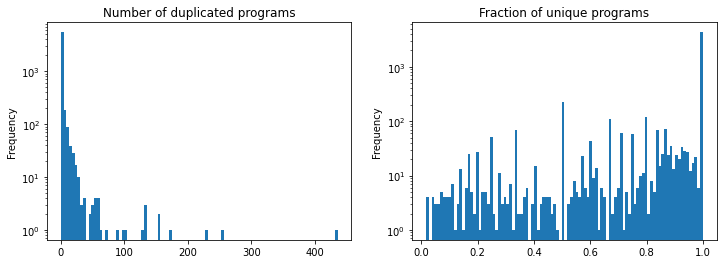

In [86]:
t = df_b_programs.groupby('index_webapp')['hash']
tt1 = t.count() - t.nunique()
tt2 = t.nunique() / t.count()
plt.figure(figsize=(12, 4))
plt.subplot(121)
tt1.plot.hist(bins=100, title='Number of duplicated programs', logy=True)
plt.subplot(122)
tt2.plot.hist(bins=100, title='Fraction of unique programs', logy=True)
plt.savefig('output/fig/2_programs.png', dpi=300, bbox_inches='tight')

In [85]:
df_b_programs['hash'].nunique(), df_b_programs['hash'].count()

(17330, 45600)

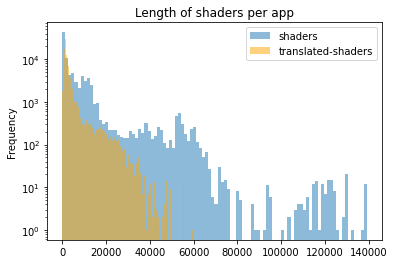

In [9]:
df_b_shaders.source.map(lambda x: len(x)).plot(kind='hist', bins=100, logy=True, title='Length of shaders per app', alpha=0.5)
df_b_shaders.translatedSource.map(lambda x: len(x)).plot(kind='hist', bins=100, logy=True, title='Length of shaders per app', color='orange', alpha=0.5)
plt.legend(['shaders', 'translated-shaders'])
plt.savefig('output/fig/2_shaders_length.png', dpi=300)

In [10]:
df_b_shaders.translatedSource.count(), df_b_shaders.translatedSource.nunique()

(90424, 23059)

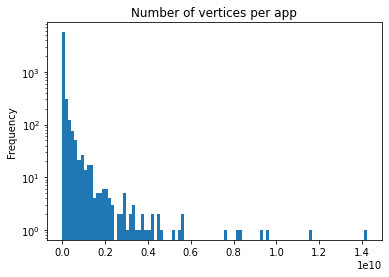

In [17]:
df_ab['maghsk.counter.vertexCount'].plot(kind='hist', bins=100, logy=True, title='Number of vertices per app')
plt.savefig('output/fig/2_vertices.png', dpi=300)

In [14]:
df_ab['maghsk.counter.primitiveCount'] = df_ab['maghsk.counter.primitiveCount.0'] + (df_ab['maghsk.counter.primitiveCount.1'] + df_ab['maghsk.counter.primitiveCount.2'] + df_ab['maghsk.counter.primitiveCount.3']) / 2 + (df_ab['maghsk.counter.primitiveCount.4'] + df_ab['maghsk.counter.primitiveCount.5'] + df_ab['maghsk.counter.primitiveCount.6']) / 3

<Axes: title={'center': 'Number of primitives per app'}, ylabel='Frequency'>

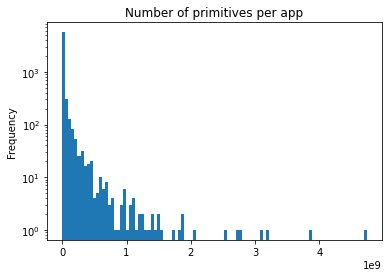

In [15]:
df_ab['maghsk.counter.primitiveCount'].plot(kind='hist', bins=100, logy=True, title='Number of primitives per app')

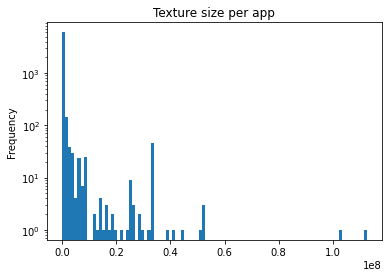

In [21]:
df_ab['textureSize'].plot(kind='hist', bins=100, logy=True, title='Texture size per app')
plt.savefig('output/fig/2_texture_size.png', dpi=300)

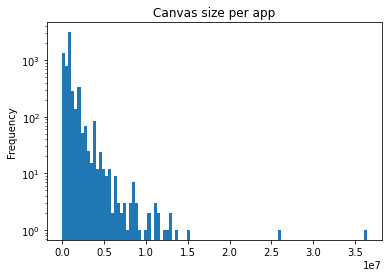

In [23]:
df_ab['canvasSize'].plot(kind='hist', bins=100, logy=True, title='Canvas size per app')
plt.savefig('output/fig/2_canvas_size.png', dpi=300)

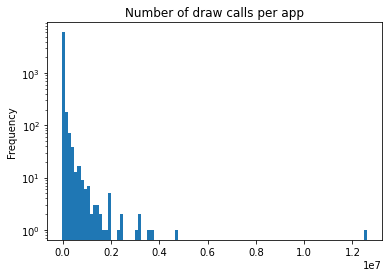

In [14]:
df_ab[['maghsk.counter.funcCount.drawArrays', 'maghsk.counter.funcCount.drawArraysInstanced', 'maghsk.counter.funcCount.drawElements', 'maghsk.counter.funcCount.drawElementsInstanced']].sum(axis=1).plot(kind='hist', bins=100, logy=True, title='Number of draw calls per app')
plt.savefig('output/fig/2_draw_calls.png', dpi=300)

In [29]:
df_b_offscreen['counter.usedOffScreenCanvas'].map(lambda x: [] if x == 0 else sorted(x)).value_counts()

counter.usedOffScreenCanvas
[]                     3939
[2d]                   2458
[webgl2]                  5
[webgl, webgl2]           2
[webgl]                   1
[2d, webgl, webgl2]       1
Name: count, dtype: int64

# performance

In [40]:
df_perf = df_perf[df_perf['frames_count'] < 700]

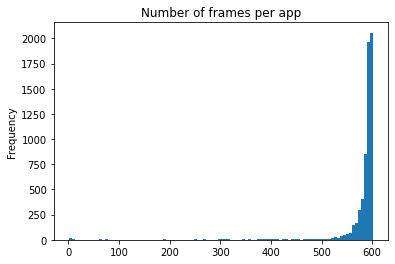

In [48]:
df_perf['frames_count'].plot(kind='hist', bins=100, logy=False, title='Number of frames per app')
plt.savefig('output/fig/2_frames.png', dpi=300)

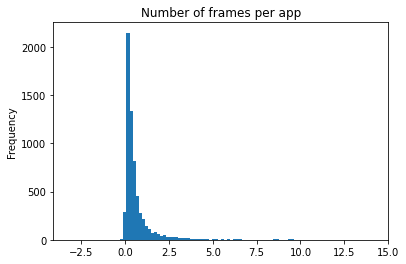

In [49]:
df_perf['cpu_full'].plot(kind='hist', bins=100, logy=False, title='Number of frames per app')
plt.savefig('output/fig/2_cpu.png', dpi=300)

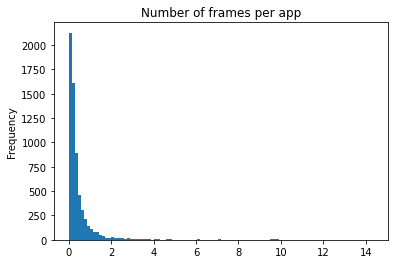

In [50]:
df_perf['gpu_full'].plot(kind='hist', bins=100, logy=False, title='Number of frames per app')
plt.savefig('output/fig/2_gpu.png', dpi=300)